# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
import numpy as np

c:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

#dataset = pd.concat([train_data, pd.merge(test_data, gender_submission, how='outer', on='PassengerId')], ignore_index=True)
dataset = train_data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Vizualization

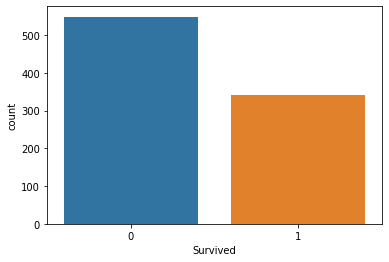

In [7]:
sns.countplot(x=dataset['Survived']);

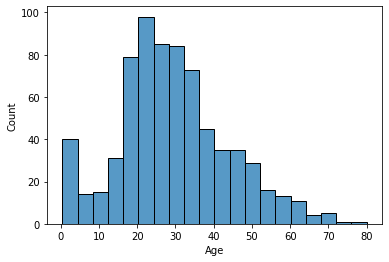

In [8]:
sns.histplot(x=dataset['Age']);

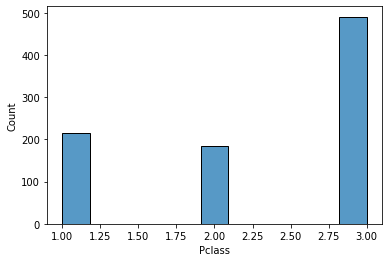

In [9]:
sns.histplot(x=dataset['Pclass']);

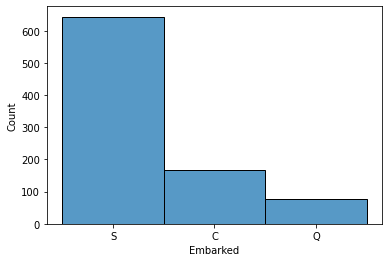

In [10]:
sns.histplot(x=dataset['Embarked']);

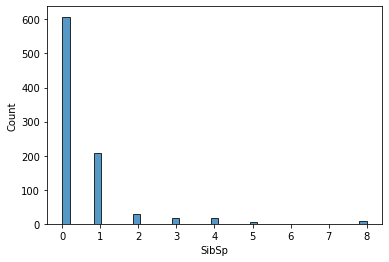

In [11]:
sns.histplot(x=dataset['SibSp']);

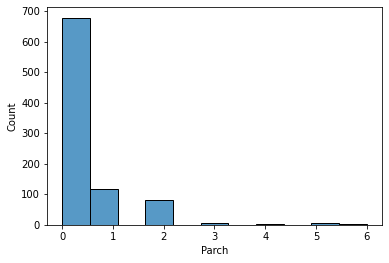

In [12]:
sns.histplot(x=dataset['Parch']);

<AxesSubplot:>

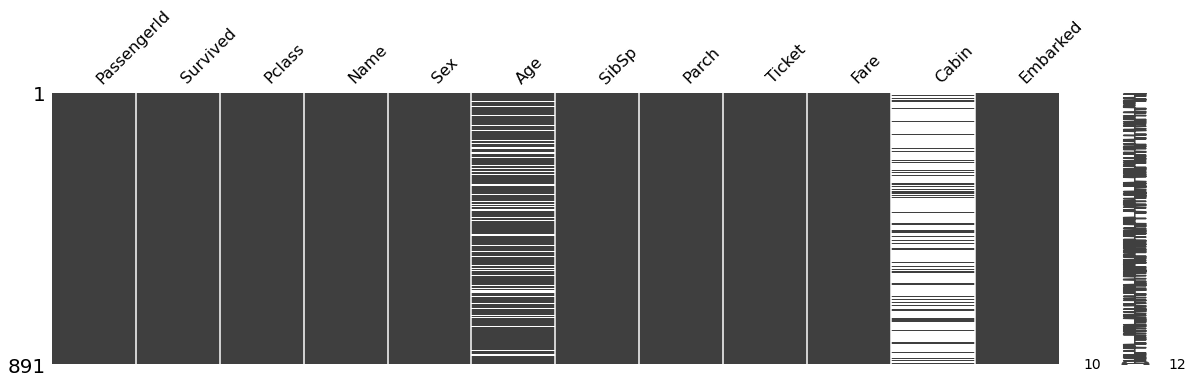

In [13]:
msno.matrix(dataset, figsize=(20,5))

<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

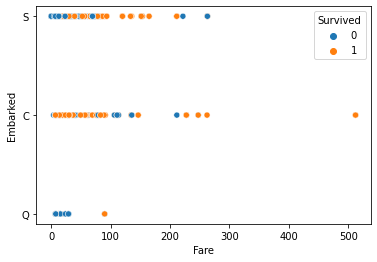

In [14]:
sns.scatterplot(x='Fare', y='Embarked', hue='Survived', data=dataset)

# Prepare Data

### Missing Data

In [15]:
dataset.loc[pd.isnull(dataset['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
dataset['Age'].mean()

29.69911764705882

In [17]:
dataset['Age'].fillna(math.floor(dataset['Age'].mean()), inplace=True)

In [18]:
dataset.loc[pd.isnull(dataset['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# Embarked, mean = S
dataset['Embarked'].fillna('S', inplace=True)

In [20]:
dataset['Fare'].fillna(math.floor(dataset['Fare'].mean()), inplace=True)

In [21]:
dataset.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

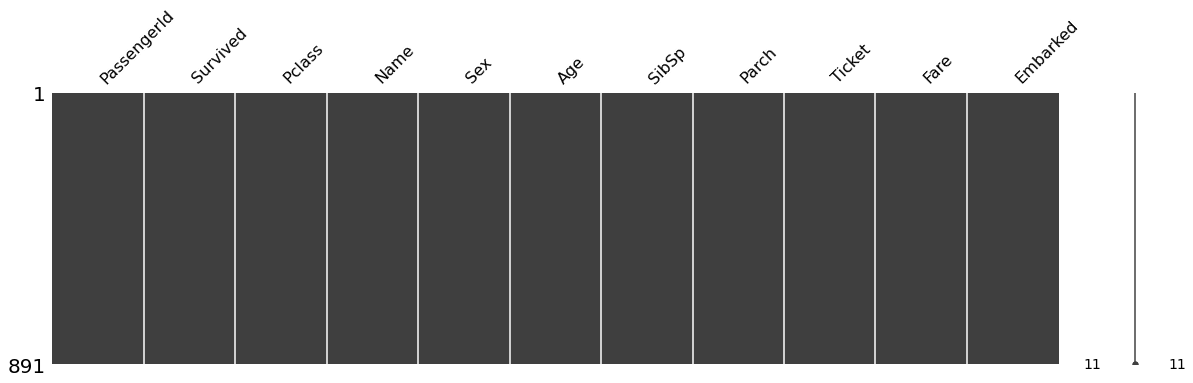

In [22]:
msno.matrix(dataset, figsize=(20,5))

# Data and Class

In [23]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = ['Survived']

x = dataset[columns].copy()
y = dataset[target].values

# Categorical attribute handling

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Label

In [26]:
x.loc[:, ['Sex', 'Embarked']] = x[['Sex', 'Embarked']].apply(LabelEncoder().fit_transform).values

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [28]:
np.unique(x['Sex'].values, return_counts=True)

(array([0, 1], dtype=int64), array([314, 577], dtype=int64))

In [29]:
np.unique(x['Embarked'].values, return_counts=True)

(array([0, 1, 2], dtype=int64), array([168,  77, 646], dtype=int64))

### One Hot

In [30]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [31]:
# pclass, sex, embarked
one_hot_encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,6])], remainder='passthrough')

In [32]:
X = one_hot_encoder.fit_transform(x)

# Normalization

In [33]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X)
x_train[0]

array([-0.56568542, -0.51015154,  0.90258736, -0.73769513,  0.73769513,
       -0.48204268, -0.30756234,  0.61583843, -0.58165904,  0.43279337,
       -0.47367361, -0.50244517])

# Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = y.reshape(-1,)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=19)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(606, 12) (606,)
(285, 12) (285,)


# Save Train Data

In [37]:
import pickle

In [38]:
with open('data.pkl', mode='wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_lr = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [41]:
predict_lr = model_lr.predict(x_test)

### Metrics

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
print(accuracy_score(y_test, predict_lr))

0.8210526315789474


# Submission

In [44]:
test_data_submission = test_data[columns].copy()

In [45]:
test_data_submission.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [46]:
test_data_submission['Age'].fillna(math.floor(test_data_submission['Age'].mean()), inplace=True)
test_data_submission['Fare'].fillna(math.floor(test_data_submission['Fare'].mean()), inplace=True)
test_data_submission.loc[:, ['Sex', 'Embarked']] = test_data_submission[['Sex', 'Embarked']].apply(LabelEncoder().fit_transform).values
test_data_submission = one_hot_encoder.fit_transform(test_data_submission)

In [47]:
predict = model_lr.predict(test_data_submission)
print(accuracy_score(gender_submission['Survived'].values, predict))

0.9401913875598086


In [48]:
gender_submission['Survived'] = predict
gender_submission.to_csv('submission.csv', index=False)